# testing code


In [0]:
!pip install cloudmesh-common

     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 92kB 6.5MB/s 
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114212 sha256=e1b223dc0974e918a442f46c2fdfb639773ce792c624fe8d278fb0f8aed60045
  Stored in directory: /root/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
  Created wheel for python-hostlist: filename=python_hostlist-1.18-cp36-none-any.whl size=38517 sha256=ec713388bfb7d7a9094da50125049bd69360d8aa3882ebe675d3e5c6aa8edb35
  Stored in directory: /root/.cache/pip/wheels/56/db/1d/b28216dccd982a983d8da66572c497d6a2e485eba7c4d6cba3
Successfully built simplejson python-hostlist


In [0]:
from cloudmesh.common.StopWatch import StopWatch

In [0]:
StopWatch.start("mount_drive")
from google.colab import drive
drive.mount('/content/drive')
StopWatch.stop("mount_drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pwd

/content


In [0]:
!ls "/content/drive/My Drive/data"

checkDirs.py  filetodir.py  words  words-a.txt


In [0]:
StopWatch.start("txt_file")
file = open("/content/drive/My Drive/data/words-a.txt", "r")
info = file.readlines()
StopWatch.stop("txt_file")

In [0]:
import pandas as pd
import numpy as np

In [0]:
len(info)

4825

In [0]:
info[0]

## 'a01-000u-00-00 ok 154 408 768 27 51 AT A\n'

'a01-000u-00-00 ok 154 408 768 27 51 AT A\n'

In [0]:
info[0].split()

['a01-000u-00-00', 'ok', '154', '408', '768', '27', '51', 'AT', 'A']

In [0]:
StopWatch.start("create_dataframe")
header = ["name", "status", "graylevel", "x", "y", "w", "h", "grammatical_tag", "transcription","temp"]
data = []
for line in info:
    temp = line.split()
    #print(temp)
    data.append(temp)
df = pd.DataFrame(data, columns=header)
df = df.drop(columns=['temp'])
StopWatch.stop("create_dataframe")

In [0]:
df.head(10)

,name,status,graylevel,x,y,w,h,grammatical_tag,transcription
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE
2,a01-000u-00-02,ok,154,796,764,70,50,TO,to
3,a01-000u-00-03,ok,154,919,757,166,78,VB,stop
4,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.
5,a01-000u-00-05,ok,154,1438,746,382,73,NP,Gaitskell
6,a01-000u-00-06,ok,154,1896,757,173,72,IN,from
7,a01-000u-01-00,ok,156,395,932,441,100,VBG,nominating
8,a01-000u-01-01,ok,156,901,958,147,79,DTI,any
9,a01-000u-01-02,ok,156,1112,958,208,42,AP,more


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [0]:
df["name"][0]

'a01-000u-00-00'

2339


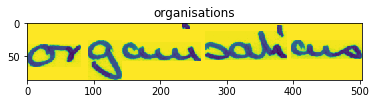

In [0]:
number = random.randint(0,len(info))
print(number)
img=mpimg.imread("/content/drive/My Drive/data/words/"+ df["name"][number]+ '.png')
imgplot = plt.imshow(img)
plt.title(df["transcription"][number])
plt.show()

In [0]:
img.dtype

dtype('float32')

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow as cvimshow

In [0]:
data=mpimg.imread("/content/drive/My Drive/data/words/"+ df["name"][number]+ '.png')
data

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

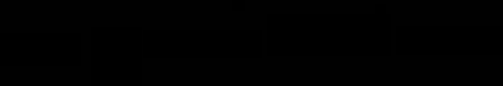

In [0]:
cvimshow(data)

In [0]:
info = data.dtype # Get the information of the incoming image type
print(info)

float32


In [0]:
np.max(data)

1.0

In [0]:
data = data.astype(np.float64) / np.max(data) # normalize the data to 0 - 1
data

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [0]:
data = 255 * data # Now scale by 255

In [0]:
img = data.astype(np.uint8)

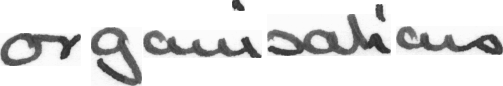

In [0]:
cvimshow(img)

In [0]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [0]:
img.shape

(86, 503)

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import time

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model



import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
np.array(mpimg.imread("/content/drive/My Drive/data/words/"+ df["name"][number]+ '.png'))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df['image'] = 0

In [0]:
df.head(2)

,name,status,graylevel,x,y,w,h,grammatical_tag,transcription,image
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A,0
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE,0


In [0]:
StopWatch.start("image_array_to_dataframe")
for index, row in df.iterrows():
  row["image"] = mpimg.imread("/content/drive/My Drive/data/words/"+ row["name"]+ '.png')
StopWatch.stop("image_array_to_dataframe")

OSError: ignored

In [0]:
df.head()

In [0]:
StopWatch.start("train_test_split")
x = df['image']
y = df['transcription']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
StopWatch.stop("train_test_split")

In [0]:
charList = """!"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"""

In [0]:
wordCharList = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

#final

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Imports
from __future__ import division
import numpy as np
import os
import glob
from PIL import Image
from random import *
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, Activation, BatchNormalization
from keras.layers.convolutional import Convolution2D, Cropping2D, ZeroPadding2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

Using TensorFlow backend.


In [0]:
# Create sentence writer mapping
#Dictionary with form and writer mapping
d = {}
with open('/content/drive/My Drive/forms_for_parsing.txt') as f:
    content = f.readlines()
    for line in f:
        key = line.split(' ')[0]
        writer = line.split(' ')[1]
        d[key] = writer

In [0]:
d

{}

In [0]:
len(content)

1539

In [0]:
content[0]

'a01-000u 000 2 prt 7 5 52 36\n'

In [0]:
# Create array of file names and corresponding target writer names
tmp = []
target_list = []
path_to_files = os.path.join('/content/drive/My Drive/data_subset', '*')
for filename in sorted(glob.glob(path_to_files)):
    tmp.append(filename)
    image_name = filename.split('/')[-1]
    file, ext = os.path.splitext(image_name)
    parts = file.split('-')
    form = parts[0] + '-' + parts[1]
    for key in d:
        if key == form:
            target_list.append(str(d[form]))

img_files = np.asarray(tmp)
img_targets = np.asarray(target_list)

In [0]:
img_targets

array([], dtype=float64)

In [0]:
len(img_files)

4899

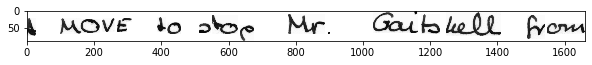

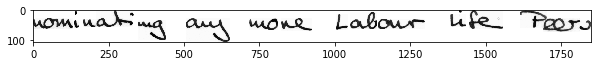

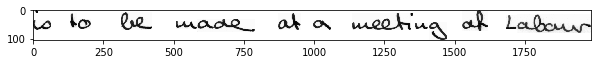

In [0]:
# Visualizing the data
for filename in img_files[:3]:
    img=mpimg.imread(filename)
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap ='gray')

In [0]:
# Label Encode writer names for one hot encoding later
encoder = LabelEncoder()
encoder.fit(img_targets)
encoded_Y = encoder.transform(img_targets)

print(img_files[:5], img_targets[:5], encoded_Y[:5])

['/content/drive/My Drive/data_subset/a01-000u-s00-00.png'
 '/content/drive/My Drive/data_subset/a01-000u-s00-01.png'
 '/content/drive/My Drive/data_subset/a01-000u-s00-02.png'
 '/content/drive/My Drive/data_subset/a01-000u-s00-03.png'
 '/content/drive/My Drive/data_subset/a01-000u-s01-00.png'] [] []


In [0]:
#split into test train and validation in ratio 4:1:1

from sklearn.model_selection import train_test_split
train_files, rem_files, train_targets, rem_targets = train_test_split(
        img_files, encoded_Y, train_size=0.66, random_state=52, shuffle= True)

validation_files, test_files, validation_targets, test_targets = train_test_split(
        rem_files, rem_targets, train_size=0.5, random_state=22, shuffle=True)

print(train_files.shape, validation_files.shape, test_files.shape)
print(train_targets.shape, validation_targets.shape, test_targets.shape)

ValueError: ignored

In [0]:
# Generator function for generating random crops from each sentence

# # Now create generators for randomly cropping 113x113 patches from these images

batch_size = 16
num_classes = 50

# Start with train generator shared in the class and add image augmentations
def generate_data(samples, target_files,  batch_size=batch_size, factor = 0.1 ):
    num_samples = len(samples)
    from sklearn.utils import shuffle
    while 1: # Loop forever so the generator never terminates
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            batch_targets = target_files[offset:offset+batch_size]

            images = []
            targets = []
            for i in range(len(batch_samples)):
                batch_sample = batch_samples[i]
                batch_target = batch_targets[i]
                im = Image.open(batch_sample)
                cur_width = im.size[0]
                cur_height = im.size[1]

                # print(cur_width, cur_height)
                height_fac = 113 / cur_height

                new_width = int(cur_width * height_fac)
                size = new_width, 113

                imresize = im.resize((size), Image.ANTIALIAS)  # Resize so height = 113 while keeping aspect ratio
                now_width = imresize.size[0]
                now_height = imresize.size[1]
                # Generate crops of size 113x113 from this resized image and keep random 10% of crops

                avail_x_points = list(range(0, now_width - 113 ))# total x start points are from 0 to width -113

                # Pick random x%
                pick_num = int(len(avail_x_points)*factor)

                # Now pick
                random_startx = sample(avail_x_points,  pick_num)

                for start in random_startx:
                    imcrop = imresize.crop((start, 0, start+113, 113))
                    images.append(np.asarray(imcrop))
                    targets.append(batch_target)

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(targets)

            #reshape X_train for feeding in later
            X_train = X_train.reshape(X_train.shape[0], 113, 113, 1)
            #convert to float and normalize
            X_train = X_train.astype('float32')
            X_train /= 255

            #One hot encode y
            y_train = to_categorical(y_train, num_classes)

            yield shuffle(X_train, y_train)

In [0]:
# Generate data for training and validation
train_generator = generate_data(train_files, train_targets, batch_size=batch_size, factor = 0.3)
validation_generator = generate_data(validation_files, validation_targets, batch_size=batch_size, factor = 0.3)
test_generator = generate_data(test_files, test_targets, batch_size=batch_size, factor = 0.1)

In [0]:
# Build a neural network in Keras

# Function to resize image to 56x56
def resize_image(image):
    import tensorflow as tf
    return tf.image.resize_images(image,[56,56])

# Function to resize image to 64x64
row, col, ch = 113, 113, 1

model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(row, col, ch)))

# Resise data within the neural network
model.add(Lambda(resize_image))  #resize images to allow for easy computation

# CNN model - Building the model suggested in paper

model.add(Convolution2D(filters= 32, kernel_size =(5,5), strides= (2,2), padding='same', name='conv1')) #96
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool1'))

model.add(Convolution2D(filters= 64, kernel_size =(3,3), strides= (1,1), padding='same', name='conv2'))  #256
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool2'))

model.add(Convolution2D(filters= 128, kernel_size =(3,3), strides= (1,1), padding='same', name='conv3'))  #256
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool3'))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, name='dense1'))  #1024
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256, name='dense2'))  #1024
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))  #softmax since output is within 50 classes

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
print(model.summary())

In [0]:
# Train the model 

nb_epoch = 1

samples_per_epoch = 3268
nb_val_samples = 842


#save every model using Keras checkpoint
from keras.callbacks import ModelCheckpoint
filepath="checkpoint2/check-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath= filepath, verbose=1, save_best_only=False)
callbacks_list = [checkpoint]

#Model fit generator
history_object = model.fit_generator(train_generator, samples_per_epoch= samples_per_epoch,
                                     validation_data=validation_generator,
                                     nb_val_samples=nb_val_samples, nb_epoch=nb_epoch, verbose=1, callbacks=callbacks_list)

In [0]:
##test

In [0]:
# Load save model and use for prediction on test set
model.load_weights('low_loss.hdf5')
scores = model.evaluate_generator(test_generator,842) 
print("Accuracy = ", scores[1])

In [0]:
images = []
for filename in test_files[:50]:
    im = Image.open(filename)
    cur_width = im.size[0]
    cur_height = im.size[1]

    # print(cur_width, cur_height)
    height_fac = 113 / cur_height

    new_width = int(cur_width * height_fac)
    size = new_width, 113

    imresize = im.resize((size), Image.ANTIALIAS)  # Resize so height = 113 while keeping aspect ratio
    now_width = imresize.size[0]
    now_height = imresize.size[1]
    # Generate crops of size 113x113 from this resized image and keep random 10% of crops

    avail_x_points = list(range(0, now_width - 113 ))# total x start points are from 0 to width -113

    # Pick random x%
    factor = 0.1
    pick_num = int(len(avail_x_points)*factor)
    
    random_startx = sample(avail_x_points,  pick_num)

    for start in random_startx:
        imcrop = imresize.crop((start, 0, start+113, 113))
        images.append(np.asarray(imcrop))
        
    X_test = np.array(images)
    
    X_test = X_test.reshape(X_test.shape[0], 113, 113, 1)
    #convert to float and normalize
    X_test = X_test.astype('float32')
    X_test /= 255
    shuffle(X_test)

print(X_test.shape)

In [0]:
# Play with results from model 
predictions = model.predict(X_test, verbose =1)

print(predictions.shape)
predicted_writer = []
for pred in predictions:
    predicted_writer.append(np.argmax(pred))
print(len(predicted_writer))

In [0]:
writer_number = 18
total_images =10
counter = 0
for i in range(len(predicted_writer)//10):
    if predicted_writer[i] == writer_number:
        image = X_test[i].squeeze()
        plt.figure(figsize=(2,2))
        plt.imshow(image, cmap ='gray')

In [0]:
StopWatch.start("")

StopWatch.stop("")

In [0]:
StopWatch.benchmark()


+---------------------+------------------------------------------------------------------+
| Machine Attribute   | Value                                                            |
+---------------------+------------------------------------------------------------------+
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.3 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           